## Exercise-1

## Taylor approximation

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import *

In [4]:
x = np.linspace(-10,10,100)

In [22]:
def theoretical(x):
    return np.exp(x)

# this function calculate the factorial of a given number n
def factorial(n):
    tmp = 1
    if (n == 0 or n == 1):
        return 1
    for i in range(1,n+1):
        tmp *= i
    return tmp


def taylor(x,n):
    tmp = []
    for i in x:
        sum = 0
        for n in range(0,n+1):
            sum += (i**(n))/factorial(n)
        tmp.append(sum)
    return tmp

In [38]:
y_tlr_5 = taylor(x,5)
y_tlr_10 = taylor(x,10)
y_tlr_15 = taylor(x,15)
y_thr = theoretical(x)

In [53]:
figure(figsize=[10,7])
_ = plt.plot(x,y_tlr_5, label = 'taylor n=5')
_ = plt.plot(x,y_tlr_10, label = 'taylor n=10')
_ = plt.plot(x,y_tlr_15, label = 'taylor n=15')
_ = plt.plot(x, y_thr, label = 'exponential in-built')
_ = plt.legend()
_ = plt.title("Approximation for Taylor expantion with different degrees")

In [54]:
figure(figsize=[10,7])
_ = plt.plot(x,abs(y_tlr_5-y_thr), label = 'taylor n=5')
_ = plt.plot(x,abs(y_tlr_10-y_thr), label = 'taylor n=10')
_ = plt.plot(x,abs(y_tlr_15-y_thr), label = 'taylor n=15')
# _ = plt.plot(x, y_thr, label = 'exponential in-built')
_ = plt.legend()
_ = plt.title("Error for taylor expantion")

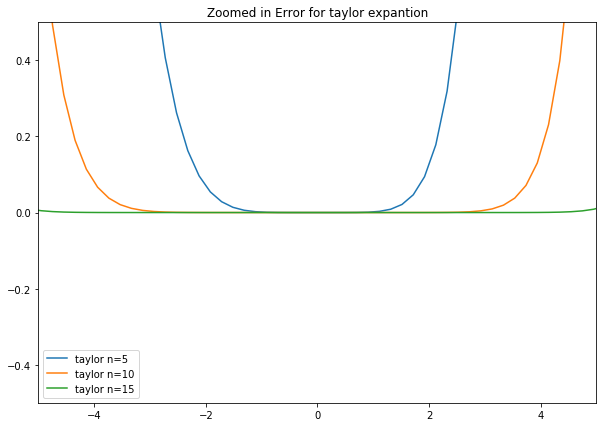

In [56]:
figure(figsize=[10,7])
_ = plt.plot(x,abs(y_tlr_5-y_thr), label = 'taylor n=5')
_ = plt.plot(x,abs(y_tlr_10-y_thr), label = 'taylor n=10')
_ = plt.plot(x,abs(y_tlr_15-y_thr), label = 'taylor n=15')
_ = plt.xlim(-5,5)     
_ = plt.legend()
_ = plt.ylim(-0.5,0.5)     
_ = plt.title("Zoomed in Error for taylor expantion")

#### * We can obseve here that with a smaller dimenson the approximation by Taylor's expantion is falling short of the otiginal value really quickly aroung `x=5.5` .
#### * But with an incresed dimenson the accuracy inches closer towards the actual value. As we can see for dimensonal value of 15 it's almost equal to the original value og `exp(x)`. Followed by `n=10` and `n=5`.
#### * The error stsrt diversing after `e^2` usually. With higher order it can be conained for little more.


## Pade approximation

In [84]:
# It retuns back the p_polynomial of the Pade approximation
def p_poly(x,p,q):
    tmp = []
    for i in x:
        sum = 0
        for j in range(0,p+1):
            a = (i**(j))*facotrial(p+q-j)*facotrial(p)
            b = (factorial(p+q)*factorial(p-j)*facotrial(j))
            sum += a/b
        tmp.append(sum)
    return tmp

# It retuns back the q-polynomial of the Pade approximation
def q_poly(x,p,q):
    tmp = []
    for i in x:
        sum = 0
        for j in range(0,q+1):
            a = ((-i)**(j))*facotrial(p+q-j)*facotrial(p)
            b = (factorial(p+q)*factorial(q-j)*facotrial(j))
            sum += a/b
        tmp.append(sum)
    return tmp

# In this function we are calculating the p and q polynomial of the pade approximation 
#and then simply deviding them to approximate the exponantial

def pade(x,p,q):
    tmp1 = p_poly(x,p,q)
    tmp2 = q_poly(x,p,q)
    tmp = []
    for i in range(np.size(x)):
        tmp.append(tmp1[i]/tmp2[i])
    return tmp

In [85]:
y_pade = pade(x,4,4)

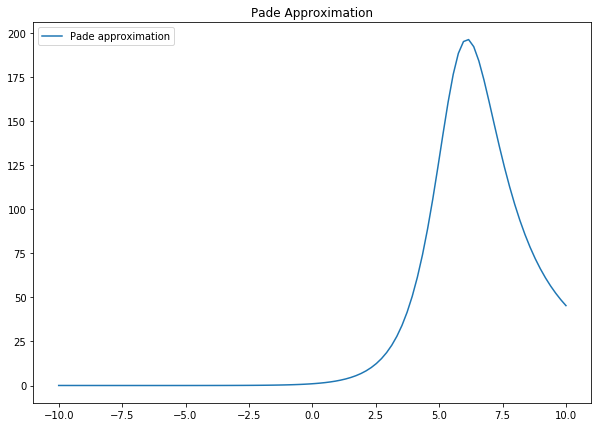

In [88]:
figure(figsize=[10,7])
# _ = plt.plot(x,y_tlr_5, label = 'taylor n=5')
# _ = plt.plot(x,y_tlr_10, label = 'taylor n=10')
_ = plt.plot(x,y_pade, label = 'Pade approximation')
# _ = plt.plot(x, y_thr, label = 'exponential in-built')
_ = plt.legend()
_ = plt.title("Pade Approximation")

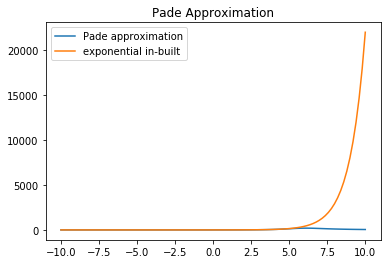

In [90]:
figure()
# _ = plt.plot(x,y_tlr_5, label = 'taylor n=5')
# _ = plt.plot(x,y_tlr_10, label = 'taylor n=10')
_ = plt.plot(x,y_pade, label = 'Pade approximation')
_ = plt.plot(x, y_thr, label = 'exponential in-built')
_ = plt.legend()
_ = plt.title("Pade Approximation")

In [93]:
y_pade_6 = pade(x,6,6)
y_pade_8 = pade(x,8,8)

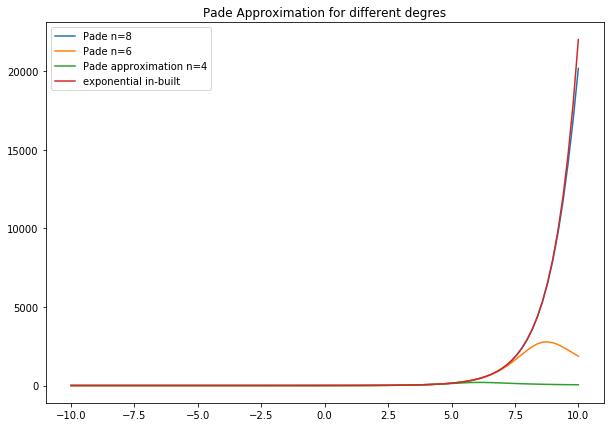

In [99]:
figure(figsize=[10,7])
_ = plt.plot(x,y_pade_8, label = 'Pade n=8')
_ = plt.plot(x,y_pade_6, label = 'Pade n=6')
_ = plt.plot(x,y_pade, label = 'Pade approximation n=4')
_ = plt.plot(x, y_thr, label = 'exponential in-built')
_ = plt.legend()
_ = plt.title("Pade Approximation for different degres")

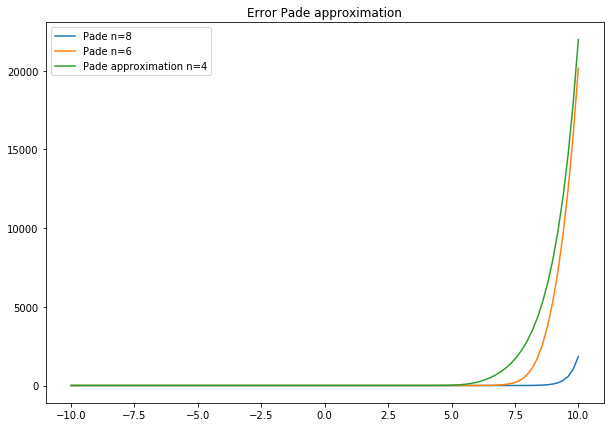

In [101]:
figure(figsize=[10,7])
_ = plt.plot(x,abs(y_pade_8-y_thr), label = 'Pade n=8')
_ = plt.plot(x,abs(y_pade_6-y_thr), label = 'Pade n=6')
_ = plt.plot(x,abs(y_pade-y_thr), label = 'Pade approximation n=4')
# _ = plt.plot(x, y_thr, label = 'exponential in-built')
_ = plt.legend()
_ = plt.title("Error Pade approximation")

#### * Pade approximation is good for `x< 0` and x closer to zero.
#### * Fails mesarably for larger value of x.
#### * With higher degress the pade is also performing better at larger x value also.

### Comparing the Taylor approximation and Pade approximation

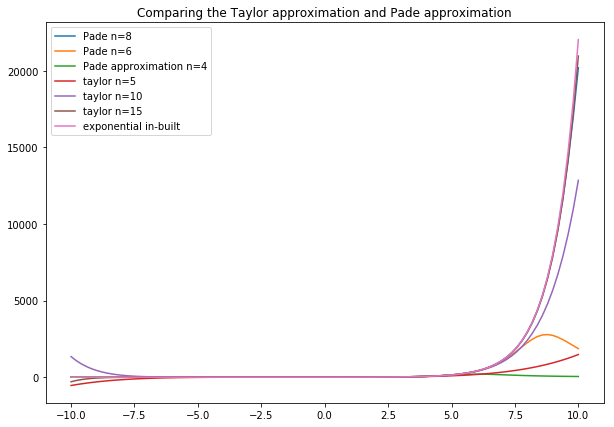

In [102]:
figure(figsize=[10,7])
_ = plt.plot(x,y_pade_8, label = 'Pade n=8')
_ = plt.plot(x,y_pade_6, label = 'Pade n=6')
_ = plt.plot(x,y_pade, label = 'Pade approximation n=4')
_ = plt.plot(x,y_tlr_5, label = 'taylor n=5')
_ = plt.plot(x,y_tlr_10, label = 'taylor n=10')
_ = plt.plot(x,y_tlr_15, label = 'taylor n=15')
_ = plt.plot(x, y_thr, label = 'exponential in-built')
_ = plt.legend()
_ = plt.title("Comparing the Taylor approximation and Pade approximation")

Pade works very well for nagetive x and value closer to 0 but for larger x it's off by large margins.From the error plot and the comparing plots, the behavior is very evident.